In [5]:
sensor_names = {
    "BackL": 0,
    "BackR": 1,
    "FrontL": 2,
    "FrontR": 3,
    "FrontC": 4,
    "FrontRR": 5,
    "BackC": 6,
    "FrontLL": 7,
}

In [1]:
import matplotlib.pyplot as plt

# Pre-processing function
def process_file(file_path):
    result = []
    with open(file_path, "r") as file:
        for line in file:
            cleaned_line = line.strip().replace("[", "").replace("]", "")
            numbers = [float(num) for num in cleaned_line.split(",")]
            result.append(numbers)
    return result

# Plotting function
def plot_sensor_readings(file_path):

    parts = file_path.split('/')[1].split('_')
    parts[-1] = parts[-1].replace('.txt', '')
    run_type = parts[-1] 
    sensor_id = parts[0]
    # Sensor names and corresponding indices
    sensor_names = {
        "BackL": 0,
        "BackR": 1,
        "FrontL": 2,
        "FrontR": 3,
        "FrontC": 4,
        "FrontRR": 5,
        "BackC": 6,
        "FrontLL": 7,
    }

    # Predefined colours for each sensor
    sensor_colours = {
        "BackL": "red",
        "BackR": "green",
        "FrontL": "orange",
        "FrontR": "purple",
        "FrontC": "blue",  
        "FrontRR": "cyan",
        "BackC": "brown",
        "FrontLL": "pink",
    }

    sensor_dir = {
        'FrontC' : 'frontal',
        'BackC' : 'rear'
    }

    # Process the file to get data
    data = process_file(file_path)

    # Transpose the data to access readings by sensor
    sensor_data = list(zip(*data))  # Each sublist corresponds to a sensor

    # Plot all sensor readings in one figure
    plt.figure(figsize=(12, 8))
    for sensor_name, index in sensor_names.items():
        alpha_value = 1.0 if sensor_name == sensor_id else 0.3  # Full opacity for 'FrontC', semi-transparent for others
        plt.plot(sensor_data[index], marker="o", label=sensor_name, color=sensor_colours[sensor_name], alpha=alpha_value)

    # Add a horizontal line at y=200
    plt.axhline(y=200, color="black", linestyle="--", linewidth=1, label="Threshold")

    # Add labels, title, legend, and grid
    plt.xlabel("Sample Index")
    plt.ylabel("Sensor Readings")
    plt.title(f"{run_type} sensor readings when detecting {sensor_dir[sensor_id]} obstruction")
    plt.legend(loc="upper left", title="Sensors")
    plt.grid(True)

    # Show the plot
    plt.savefig(f"plots/{sensor_dir[sensor_id]}_{run_type}.png")
    plt.show()


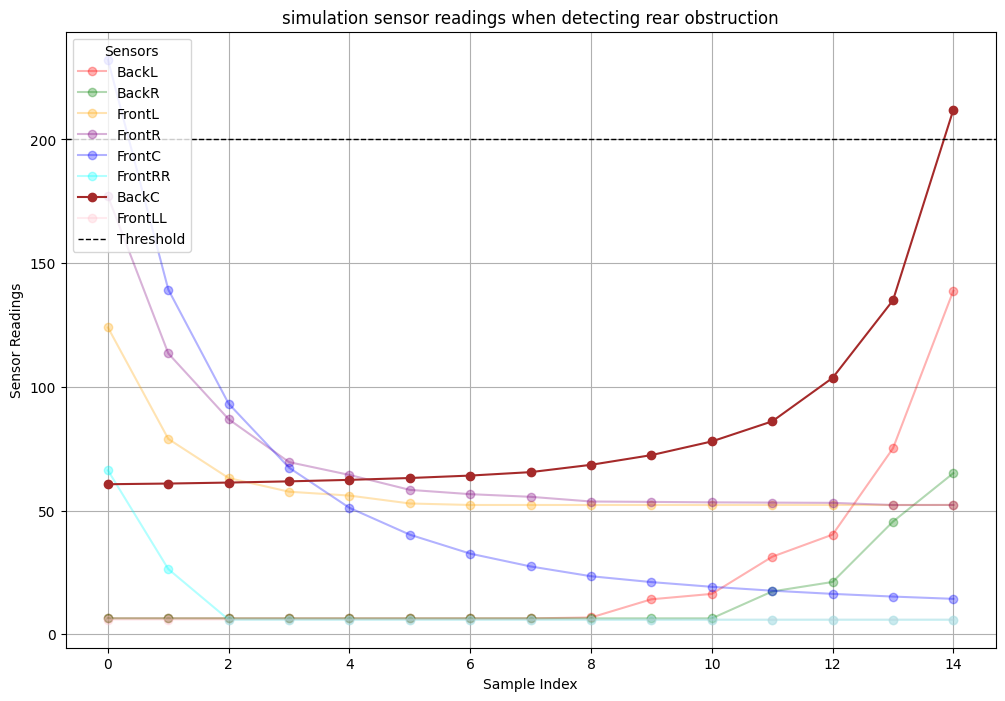

In [3]:
file_path = "readings/BackC_readings_simulation.txt"
plot_sensor_readings(file_path)

In [6]:
rear_hw = process_file("readings/BackC_readings_hardware.txt")
rear_sim = process_file("readings/BackC_readings_simulation.txt")
front_hw = process_file("readings/FrontC_readings_hardware.txt")
front_sim = process_file("readings/FrontC_readings_simulation.txt")

rear_hw = list(zip(*rear_hw))
rear_sim = list(zip(*rear_sim))
front_hw = list(zip(*front_hw))
front_sim = list(zip(*front_sim))

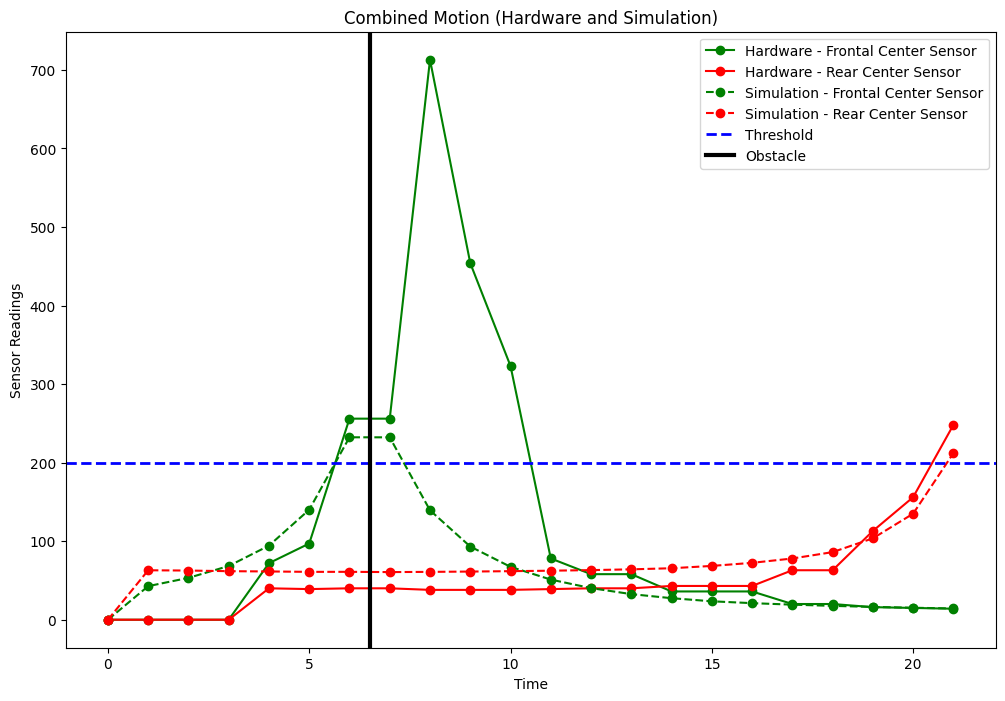

In [21]:
import matplotlib.pyplot as plt

# Pre-processing function for a single file
def process_file(file_path):
    result = []
    with open(file_path, "r") as file:
        for line in file:
            cleaned_line = line.strip().replace("[", "").replace("]", "")
            numbers = [float(num) for num in cleaned_line.split(",")]
            result.append(numbers)
    return result

# Main plotting function
def plot_combined_movements(file_paths, labels, is_hardware):
    """
    file_paths: List of file paths for sensor readings.
    labels: List of labels corresponding to the file paths (e.g., "Hardware Forward").
    is_hardware: List of booleans indicating whether each file is hardware (True) or simulation (False).
    """
    # Sensor indices
    sensor_indices = {"FrontC": 4, "BackC": 6}

    plt.figure(figsize=(12, 8))

    # Process each file and handle forward and backward movements
    for i in range(0, len(file_paths), 2):
        # Forward and backward file paths
        forward_file = file_paths[i]
        backward_file = file_paths[i + 1]
        label_prefix = labels[i].split()[0]  # "Hardware" or "Simulation"
        hardware = is_hardware[i]

        # Process the forward and backward files
        forward_data = process_file(forward_file)
        backward_data = process_file(backward_file)

        # Extract 'FrontC' and 'BackC' readings
        forward_front_c = [row[sensor_indices["FrontC"]] for row in forward_data]
        forward_back_c = [row[sensor_indices["BackC"]] for row in forward_data]
        backward_front_c = [row[sensor_indices["FrontC"]] for row in backward_data]
        backward_back_c = [row[sensor_indices["BackC"]] for row in backward_data]

        # Combine forward and backward readings
        combined_front_c = forward_front_c + backward_front_c
        combined_back_c = forward_back_c + backward_back_c

        # Determine line style and colour
        line_style = "-" if hardware else "--"  # Continuous for hardware, dotted for simulation
        color_front = "green"
        color_back = "red"
        marker_style = "o"

        # Plot combined data
        plt.plot(combined_front_c, line_style, marker= marker_style, color=color_front, label=f"{label_prefix} - Frontal Center Sensor")
        plt.plot(combined_back_c, line_style, marker = marker_style, color=color_back, label=f"{label_prefix} - Rear Center Sensor")

    plt.axhline(y=200, color="blue", linestyle="--", linewidth=2, label="Threshold")
    plt.axvline(x=6.5, color="black", linestyle="-", linewidth=3, label="Obstacle")
    plt.xlabel("Time")
    plt.ylabel("Sensor Readings")
    plt.title("Combined Motion (Hardware and Simulation)")
    plt.legend(loc="upper right")
    

    # Show the plot
    plt.savefig("plots/combined_movements.png")
    plt.show()

# Example usage
file_paths = [
    "readings/FrontC_readings_hardware.txt",
    "readings/BackC_readings_hardware.txt",
    "readings/FrontC_readings_simulation.txt",
    "readings/BackC_readings_simulation.txt",
]
labels = [
    "Hardware Forward",
    "Hardware Backward",
    "Simulation Forward",
    "Simulation Backward",
]

is_hardware = [True, True, False, False]  # Hardware files are True, Simulation files are False

plot_combined_movements(file_paths, labels, is_hardware)
